# Visualization of MNIST Convolutional Neural Network

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import callbacks

from IPython.display import display

In [ ]:
plt.style.use('dark_background')

### Function to draw and save on a disk

In [29]:
def predict_save(idx, model, filename=None):
    layer_activations = [layer.output for layer in model.layers]
    model_activations = models.Model(inputs=model.input, outputs=layer_activations)
    activations = model_activations.predict(X_test[idx].reshape((1, 28, 28, 1)))
    
    fig = plt.figure(figsize=(10, 10))
    cmap = "coolwarm"
    last_height = 0
    for layer_num, layer in enumerate(layer_activations):
        if layer.shape.rank == 2 and layer_names[layer_num] != "----- Flattening -----": # Dense layers
            width, height = 7.2, 0.034
            x0, y0 = (10 - width)/2, -height - last_height

            ax = fig.add_axes([x0, y0, width, height])
            ax.set_yticks([])
            ax.set_xticks([])
            ax.imshow([activations[layer_num][0,:]], cmap=cmap)
        elif layer.shape.rank == 4:
            for i in range(layer.shape[-1]):
                if layer.shape[3] >= 12:
                    width, height = 0.095, 0.095
                else:
                    width, height = 0.2, 0.2
                x0 = i * (width + 0.01) + (10 - layer[1].shape[2] * (width + 0.01)) / 2
                y0 = - height - last_height

                ax = fig.add_axes([x0, y0, width, height])
                ax.set_yticks([])
                ax.set_xticks([])
                ax.imshow(activations[layer_num][0,:,:,i], cmap=cmap)
        else:
            height = -0.01

        fig.text(5, - last_height + 0.03, layer_names[layer_num], fontdict={"size":16}, horizontalalignment='center', verticalalignment='center')
        last_height += 0.06 + height

    if not filename:
        # fig.savefig("out/" + str(idx) + ".png", bbox_inches="tight")
        # fig.show()
        display(fig)
    else:
        fig.savefig(filename, bbox_inches="tight")
    plt.clf()
    plt.close()

### Loading and preprocessing MNIST data

In [30]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((-1, 28, 28, 1)) / 255
X_test = X_test.reshape((-1, 28, 28, 1)) / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

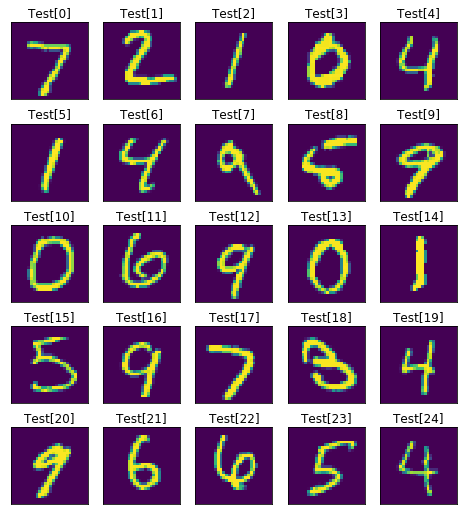

In [31]:
plt.subplots(figsize=(8,9))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape((28, 28)))
    plt.title("Test[" + str(i) + "]")

### Convolutional neural network (1)

Note that the hyperparameters of this network was selected in a such way that the visualizations look nice.

In [32]:
model0 = models.Sequential()
model0.add(layers.Lambda(lambda x: x, input_shape=(28, 28, 1), name="Input"))
model0.add(layers.Conv2D(6, (3, 3), padding="same"))
model0.add(layers.ReLU())
model0.add(layers.MaxPooling2D((2, 2)))
model0.add(layers.Conv2D(12, (3, 3), padding="same"))
model0.add(layers.ReLU())
model0.add(layers.MaxPooling2D((2, 2)))
model0.add(layers.Conv2D(12, (3, 3), padding="same"))
model0.add(layers.ReLU())
model0.add(layers.Flatten())
model0.add(layers.Dense(36))
model0.add(layers.ReLU())
model0.add(layers.Dense(18))
model0.add(layers.ReLU())
model0.add(layers.Dense(10))
model0.add(layers.Softmax())

layer_names = ["Input", 
               "Convolutional #1", "ReLU", "Max Pooling", 
               "Convolutional #2", "ReLU", "Max Pooling",
               "Convolutional #3", "ReLU", "----- Flattening -----",
               "Dense #1", "ReLU",
               "Dense #2", "ReLU",
               "Dense #3", "Softmax"]

In [33]:
model0.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = model0.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), batch_size=64, verbose=0)

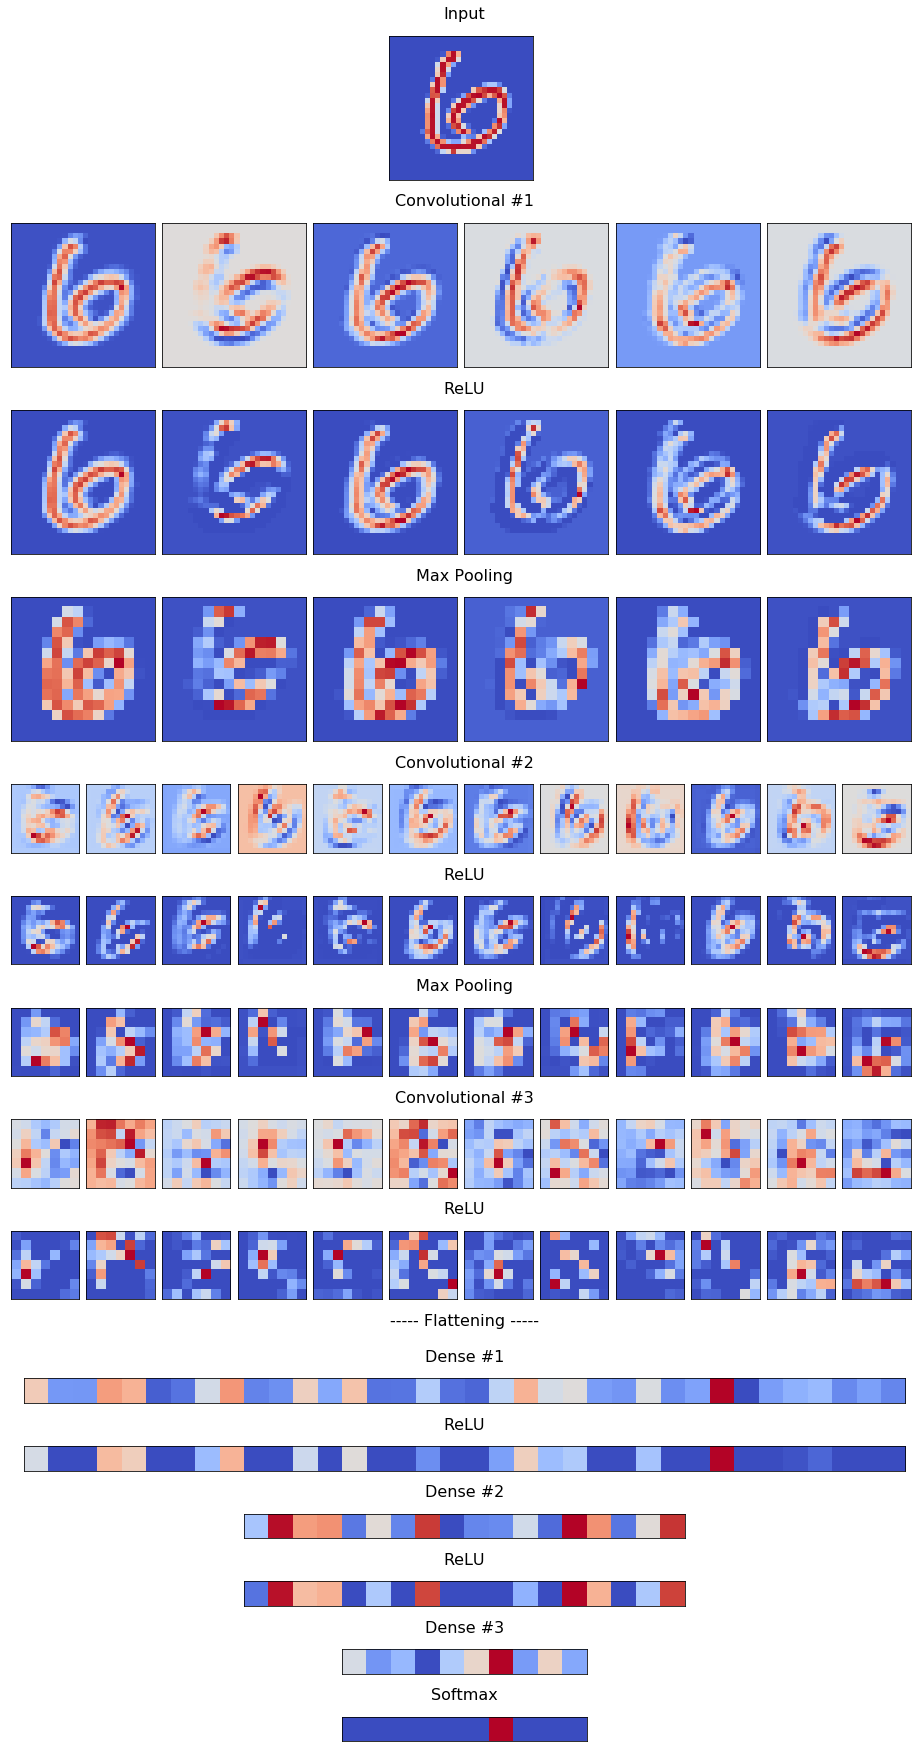

In [34]:
predict_save(11, model0)

### Convolutional neural network (2)

Note that the hyperparameters of this network was selected in a such way that the visualizations look nice.

In [35]:
model1 = models.Sequential()
model1.add(layers.Lambda(lambda x: x, input_shape=(28, 28, 1), name="Input"))
model1.add(layers.Conv2D(10, (3, 3), padding="same", activation="relu"))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(20, (3, 3), padding="same", activation="relu"))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(20, (3, 3), padding="same", activation="relu"))
model1.add(layers.Flatten())
model1.add(layers.Dense(60, activation="relu"))
model1.add(layers.Dense(10, activation="softmax"))

layer_names = ["Input", 
               "Convolutional #1", "Max Pooling", 
               "Convolutional #2", "Max Pooling",
               "Convolutional #3", "----- Flattening -----",
               "Dense #1", "Dense #2"]

In [36]:
class VisualizationLogger(callbacks.Callback):
    def set_model(self, model):
        self.model = model
        self.cnt = 0

    def on_batch_begin(self, epoch, logs=None):
        self.cnt += 1
        predict_save(8, self.model, "output/" + str(self.cnt) + ".png")

cb = []
        
model1.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = model1.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), batch_size=64, callbacks=cb, verbose=0)

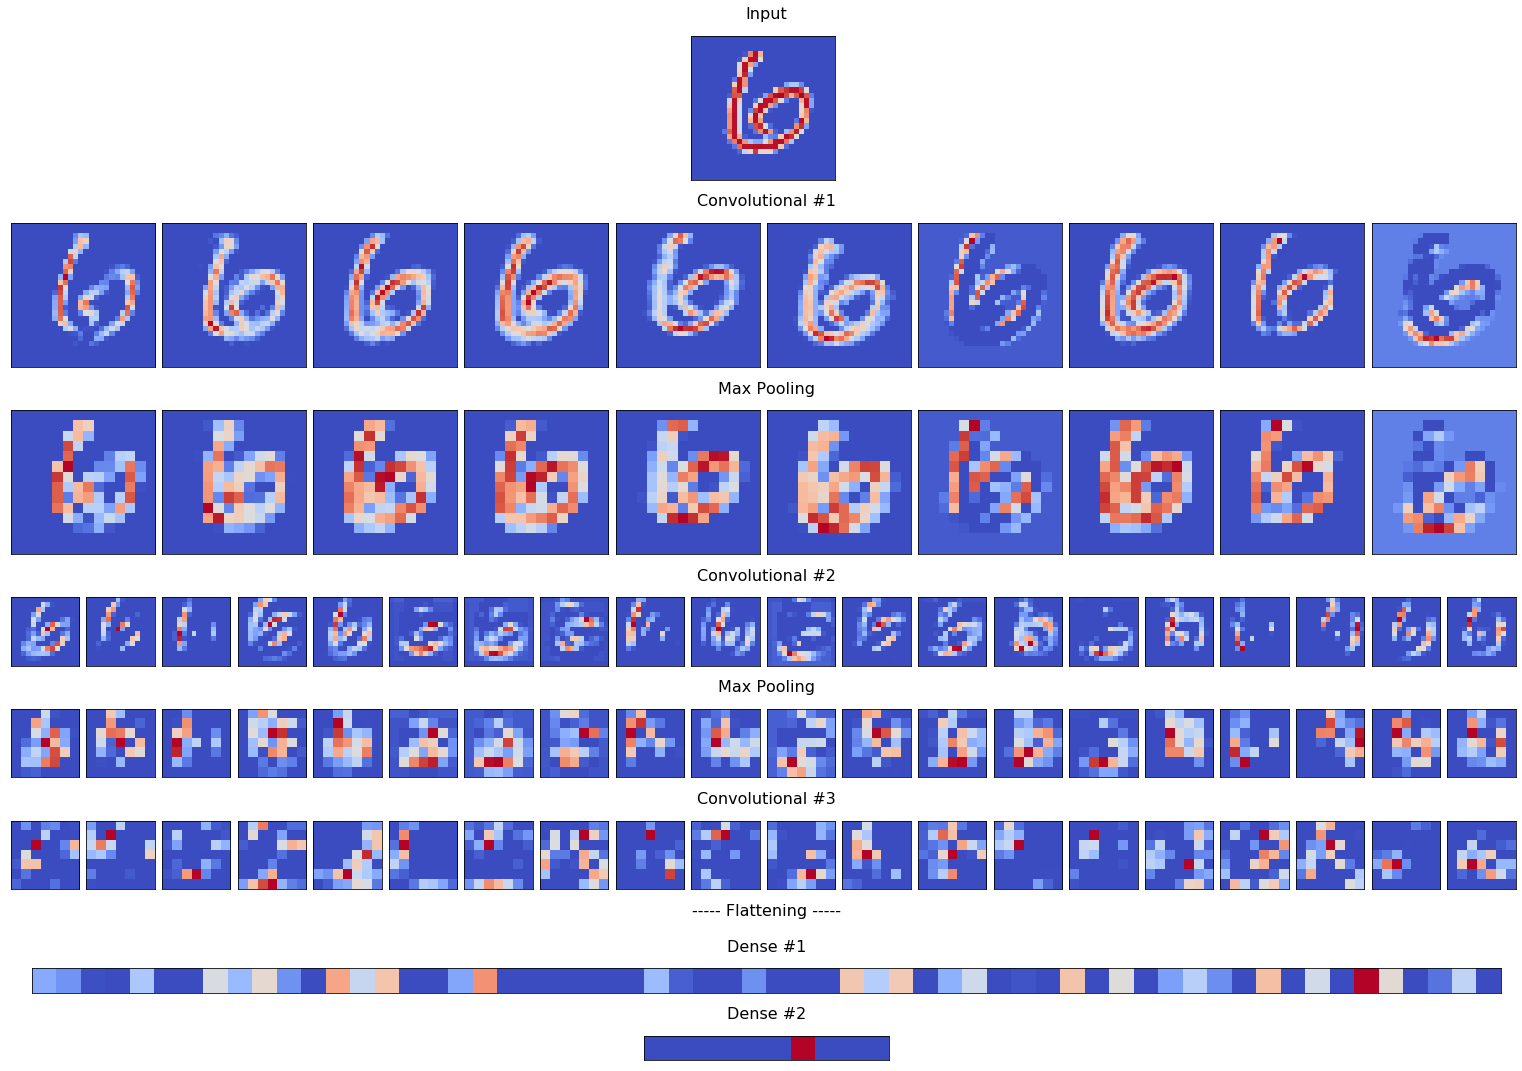

In [37]:
predict_save(11, model1)